## Описание проекта

Основная цель нашего проекта - выявить потенциально популярный продукт для дальнейшего планирования рекламной кампании. 
В нашем распоряжении данные интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры: о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Для выявления потенциально успешного продукта нам необходимо выявить определяющие успешность игры закономерности. 
План работы:
- изучение данных, предобработка для дальнейшего анализа,
- изучение динамики количества игр по годам выпуска, динамики продаж по платформам,
- изучение взаимосвязи между продажами и отзывами,
- изучение продаж игр по жанрам,
- изучение портрета пользователей,
- проверка гипотез,
- общий вывод.



## Изучение данных

In [1]:
#импортируем все библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# читаем файл и сохраняем его в переменной df
df = pd.read_csv('/datasets/games.csv')
# выведем на экран первые 20 строк таблицы
display(df.head(10))
print(df.info())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Видим, что всего строк в таблице 16715, есть пропуски в столбцах: Name и Genre (по 2 пропуска), Year_of_Release (269 пропусков), Critic_Score (8578 пропусков), User_Score (6701 пропусков), Rating (6766 пропусков). Некоторые столбцы имеют неверный тип данных, необходимо будет изменить

## Подготовка данных

### Замена наименований столбцов

Приведем все названия столбцов к нижнему регистру

In [3]:
df = df.rename(columns=str.lower)
display(df.head(10))



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Названия столбцов приведены к нижнему регистру, переходим к преобразованию данных в нужный тип

### Замена типа данных

Из информации о файле видим, что данные в столбце year_of_release имеют тим данных float64, преобразуем его к целому числу intger. Кроме того, необходимо будет изменить тип данных в столбце user_score с object на float64, но сделаем это чуть позже, после замены tbd

In [4]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
display(df.head())
print(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
None


Тип данных в столбце year_of_release успешно изменен. В остальных столбцах тип верный

### Обработка пропусков

Как уже сообщалось выше, пропуски присутствуют в столбцах: name и genre (по 2 пропуска), year_of_release (269 пропусков), critic_score (8578 пропусков), user_score (6701 пропусков), rating (6766 пропусков). Скорее всего, пропуски возникли или из-за некорректной выгрузки, или от отсутствия необходимой информации.
Методом isna() найдём 2 строки с пропусками в столбцах name и genre.

In [5]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что строки с пропусками в столбце name аналогичны строкам с пропусками в столбце genre. Продажи по этим "безымянным" играм мизерные, поэтому просто удалим эти строки.

In [6]:
df = df.dropna(subset=['name'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB
None


Да, эти строки удалены. Перейдем к столбцу year_of_release. Посмотрим на строки с пропусками

In [7]:
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Каких-либо закономерностей с пропусками не заметно, скорее всего, забыли указать при формировании данных. Заменим пропуски в данном столбце медианным значением по годам платформы, т.к. скорее всего игра на данной платформе выходила именно в те года, когда данная платформа поддерживалась.

In [8]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].transform('median'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB
None


Да, теперь пропусков в столбце year_of_release нет. Перейдем к столбцам с рейтингами critic_score, user_score, rating. Посмотрим на уникальные значения в этих столбцах.

In [9]:
display(df[df['critic_score'].isna()])
df['critic_score'].unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видим, что в столбце user_score присутствует аббревиатура tbd (to be determined, т.е. подлежит определению). Т.к. нам необходимо заменить тип данных в этом столбце на float, заменим tbd на nan. Пропуски в столбцах с оценками не будем заполнять.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', 'nan')


Т.к. отсутствие оценки не равно нулевой оценке, пропуски в оценках вообще не будем ничем заполнять


In [13]:
df['user_score'] = df['user_score'].astype('float64')

In [14]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None


Тип данных в столбце user_score изменен на float. Перейдем к подсчету суммарных продаж.

### Расчет суммарных продаж по всем регионам

Создади новый столбец all_sales, куда добавим суммарную стоимость продаж по всем регионам.

In [16]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Столбец добавлен, сумма рассчитана верно. Переходим к анализу данных.

## Исследовательский анализ данных

### Динамика количества игр

Посмотрим, сколько игр выпускалось в разные годы. Сгруппируем по годам выпуска, затем построим график.

In [17]:
name_grouping = df.groupby('year_of_release')['name'].count()
display(name_grouping)

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

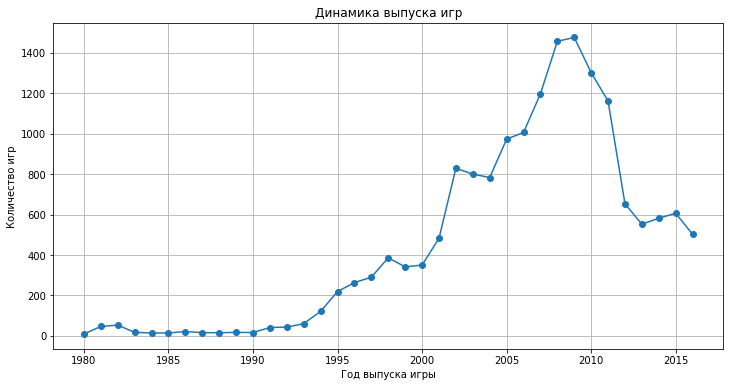

In [18]:
name_grouping.plot(y='year_of_release', style='o-', title='Динамика выпуска игр', grid=True, figsize=(12, 6))
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

Видим, что до 1994 года выпускалось менее 100 игр в год, далее идет плавный рост разработок и в 2000 году количество разрабатываемых игр составляет уже 350 в год. В 2000 году наблюдается резкий скачок в разработках, который достиг своего пика в 2009 году (1476 игр в год). После 2009 года количество разработок стало уменьшатся и в 2016 году составило 502 шт./год.

### Динамика продаж по платформам

Для выявления наиболее перспективных платформ посмотрим на суммарные продажи по каждой платформе в годовой разбивке.

In [19]:
display(df.groupby(['platform', 'year_of_release'])['all_sales'].sum())


platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               39.38
          1983                5.84
          1984                0.27
                             ...  
XB        2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: all_sales, Length: 238, dtype: float64

Видим, что до 2016 года "дожили" следующие платформы: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne. Дальнейший анализ будем вести по этим платформам. Построим график с суммарными продажами по данным платформам.

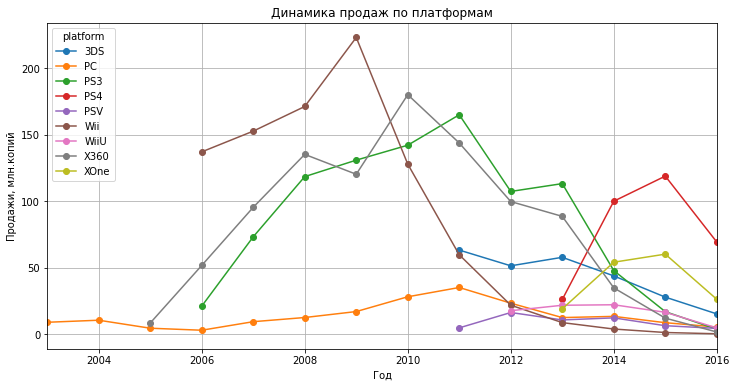

In [20]:
df_platform = df.query('platform in ["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"]')
df_platform.groupby(['platform', 'year_of_release'])['all_sales'].sum().unstack('platform').plot(style='o-', xlim=(2003, 2016), title='Динамика продаж по платформам', grid=True, figsize=(12, 6))
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий')
plt.show()

Из графика видно, что в среднем платформа "живет" от 7 лет (напр., GBA) до 11 лет (PS2, PS3). Но есть и исключения. Напр., РС жизнеспособна весь рассматриваемый период, но разработчики не особо любят писать на ней. За 3-5 лет до конца жизни одной платформы появляются одна или несколько новых, которые и вытесняют предыдущую. Видим, что к 2016 году из "жизнеспособных" осталась только PS4.
Для дальнейшего анализа и построения прогнозов на 2017 год примем в качестве актуального период с 2014 года. Лидером продаж за выбранный период являются PS4 и XOne, но и они упали в продажах к 2016 году. Пик их продаж пришелся на 2015 год.

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

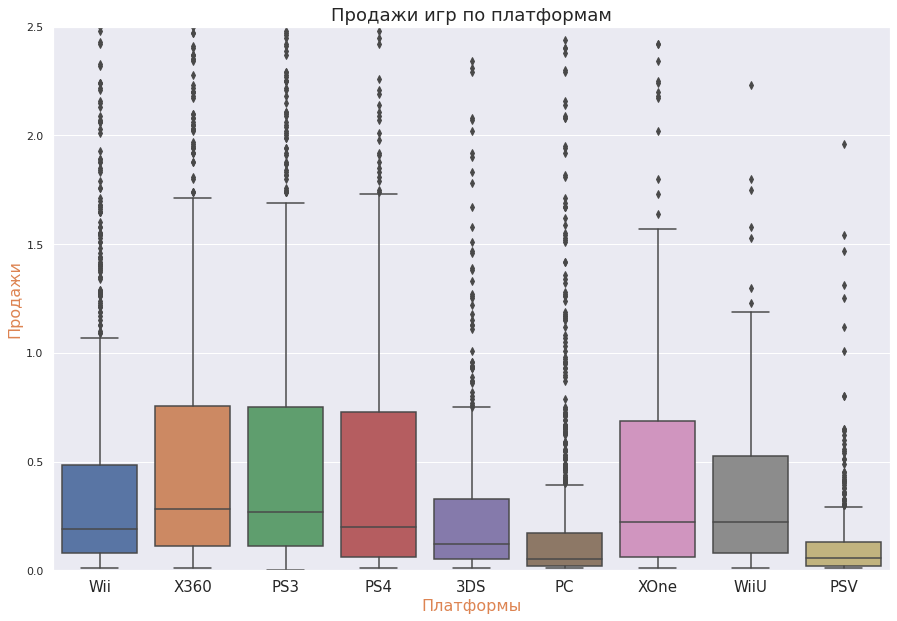

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_subplot(111, label="1")
ax = sns.boxplot(x='platform', y='all_sales', data=df_platform)
ax.set_xlabel("Платформы", color="C1", fontsize=16)
ax.set_ylabel("Продажи", color="C1", fontsize=16)
ax.set_ylim(0,2.5)
plt.title('Продажи игр по платформам', fontsize=18);
plt.xticks(fontsize=15)
plt.show()

Из графика видно, верхние "усы" игр, написанных на платформах X360, PS3, PS4, находятся на примерно одинаковом уровне 1,7 млн.проданных копий. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Таких выбросов довольно много. 
Медианные значения продаж игр на PS4 несколько ниже чем на X360 и на PS3. Но это одна из "молодых" платформ, но уже демонстрирующая хорошие продажи. Также очень перспективная платформа XOne, медианное значение продаж которой равно медианным значениям X360 и PS3. Но "выбросов" на ней гораздо меньше чем на X360 и PS3.

### Диаграмма рассеяния. Корреляция между отзывами и продажами.

Для анализа зависимости продаж от отзывов пользователей и критиков возьмем игры на одной из последних и перспективных платформ PS4. 

              all_sales  critic_score  user_score
all_sales      1.000000      0.402661   -0.040132
critic_score   0.402661      1.000000    0.546434
user_score    -0.040132      0.546434    1.000000


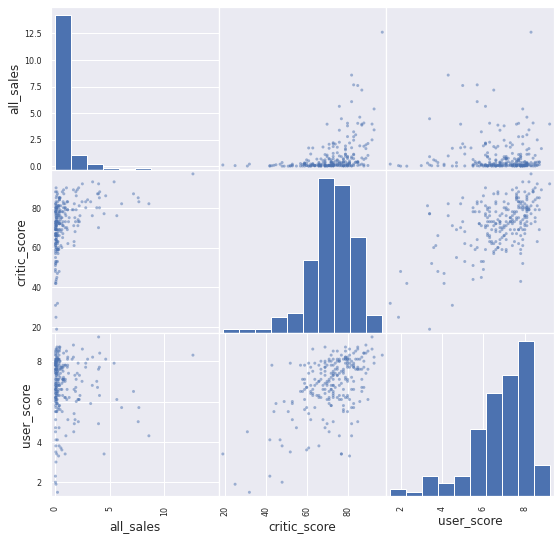

In [22]:
df_PS4 = df.query('platform == "PS4" and year_of_release>=2014')
df_PS4 = df_PS4[['platform', 'all_sales', 'critic_score', 'user_score']]
print(df_PS4.corr())
pd.plotting.scatter_matrix(df_PS4, figsize=(9, 9))
plt.show()


Исходя из диаграммы рассеяния и коэффициентов корреляции можно сделать вывод, что продажи игр на платформе PS4 не сильно зависят от оценок критиков (коэффициент корреляции 0,21). Еще меньше зависимость продаж от оценок пользователей, здесь зависимость очень слабая (коэффициент корреляции 0,1). Проверим результат на еще одной платформе XOne и X360.

              all_sales  critic_score  user_score
all_sales      1.000000      0.428677   -0.070384
critic_score   0.428677      1.000000    0.440977
user_score    -0.070384      0.440977    1.000000


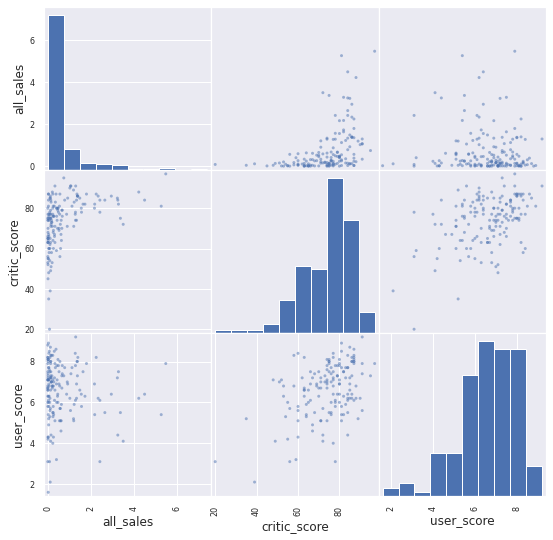

In [23]:
df_XOne = df.query('platform == "XOne" and year_of_release>=2014')
df_XOne = df_XOne[['platform', 'all_sales', 'critic_score', 'user_score']]
print(df_XOne.corr())
pd.plotting.scatter_matrix(df_XOne, figsize=(9, 9))
plt.show()

              all_sales  critic_score  user_score
all_sales      1.000000      0.525723   -0.138445
critic_score   0.525723      1.000000    0.625309
user_score    -0.138445      0.625309    1.000000


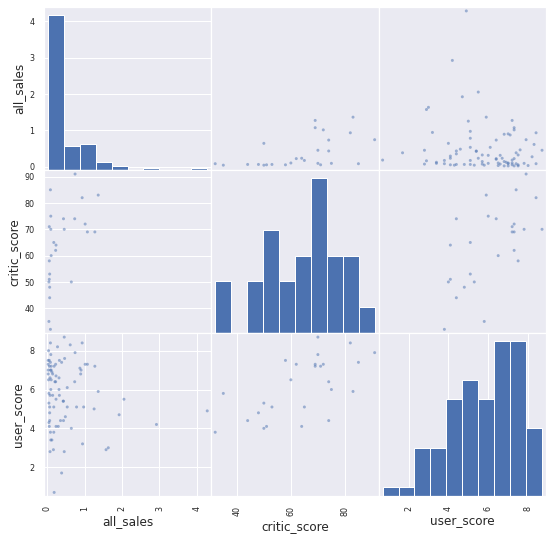

In [24]:
df_X360 = df.query('platform == "X360" and year_of_release>=2014')
df_X360 = df_X360[['platform', 'all_sales', 'critic_score', 'user_score']]
print(df_X360.corr())
pd.plotting.scatter_matrix(df_X360, figsize=(9, 9))
plt.show()

Из диаграмм видно, что ситуация с продажами игр на XOne в целом аналогична продажам игр на PS4. Зависимость продаж от оценок критиков и от оценок пользователей довольно слабая (коэффициенты корреляции 0,27 и 0,1 соответственно). А вот продажи игр на Х360 практически не зависят от рейтингов (коэффициенты корреляции 0,004 и 0,07 соответственно). Но в целом картина по всем платформам совпадает.

### Распределение игр по жанрам. Жанры с высокими и низкими продажами

Сначала посмотрим количество игр каждого жанра, потом найдем общие продажи по каждому жанру. Далее найдем жанр, где игры стабильно лидируют в продажах, для этого посмотрим медианные продажи по каждому жанру

In [25]:
df_genre = df.query('year_of_release>=2014')
df_genre['genre'].value_counts()

Action          619
Role-Playing    222
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [26]:
df_genre = df.groupby('genre').agg({'all_sales':['sum', 'median']}).sort_values(by=('all_sales', 'median'), ascending=False)
display(df_genre)

all_sales       
                   sum median
genre                        
Platform        827.77   0.27
Shooter        1052.45   0.24
Sports         1331.27   0.22
Fighting        447.53   0.21
Action         1744.17   0.19
Racing          728.67   0.19
Role-Playing    934.56   0.18
Misc            802.51   0.16
Simulation      389.97   0.15
Puzzle          242.57   0.11
Strategy        174.23   0.10
Adventure       237.59   0.05

Видим, наибольшее количество игр жанра Action, этот же жанр лидирует по суммарным продажам (619 млн.проданных копий). Но в то же время, медианные продажи здесь не самые высокие. Скорее всего, суммарные продажи высоки именно из-за того что много игр написано в этом жанре. Но может быть ситуация, когда много мелких непродаваемых игр данного жанра. Поэтому более правильно будет посмотреть медианное значение продаж. Здесь в лидерах Platform (0,27 млн.проданных копий) и Shooter (0,24).

## Портрет пользователя каждого региона

Для каждого из трех регионов (Северная Америка, Европа, Япония) составим портрет пользователя: ТОП-5 популярных платформ,  ТОП-5 популярных жанров, влияние рейтинга ESRB на продажи в каждом из этих регионов. для анализа возьмем данные за актуальный период с 2014 года (данные за предыдущие периоды отбросим).
Создадим общую функцию для построения диаграмм по всем исследуемым регионам. Функция на вход примет три значения: index (платформа, жанр или возраст), region (регион продаж), title(заголовок диаграммы).


Сначала добавим новый столбец platform_new, в который платформы с низкими продажами занесем в категорию "Другие". 


In [27]:
def platform_new(row):
    platform = row['platform']
    if'PS4' in platform:
        return 'PS4'
    if'PS3' in platform:
        return 'PS3'
    if'3DS' in platform:
        return '3DS'
    if'XOne' in platform:
        return 'XOne'
    if'X360' in platform:
        return 'X360'
    return 'Другие'
df['platform_new'] = df.apply(platform_new, axis=1)


In [28]:
display(df.head(50))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,platform_new
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Другие
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Другие
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Другие
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Другие
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Другие
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,Другие
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Другие
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Другие
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Другие
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,Другие


In [29]:
def pie_region(index, region, title):
    df_period = df[df['year_of_release']>=2014]
    df_region_pivot = df_period.pivot_table(index=index, values=region, aggfunc='sum')
    plt.figure(figsize=(18,6))
    plt.pie(x=df_region_pivot[region], labels=df_region_pivot.index, autopct='%.0f')
    plt.title(title);

Теперь с помощью функции нарисуем диаграммы 

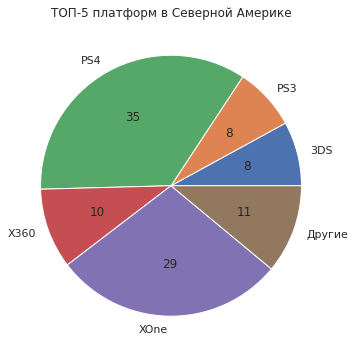

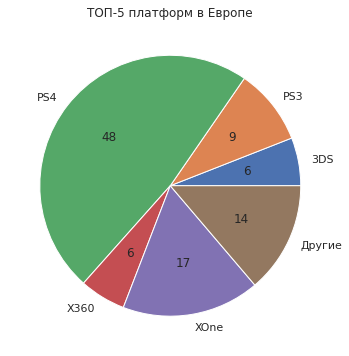

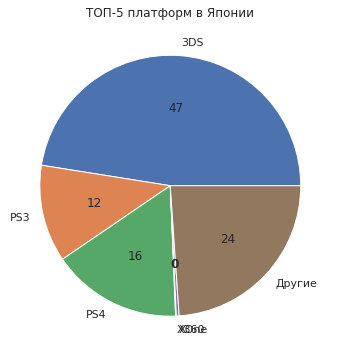

In [30]:
pie_region('platform_new', 'na_sales', 'ТОП-5 платформ в Северной Америке')
pie_region('platform_new', 'eu_sales', 'ТОП-5 платформ в Европе')
pie_region('platform_new', 'jp_sales', 'ТОП-5 платформ в Японии')

Видим, что пользователи в Северной Америке и Европе имеют схожие вкусы: В ТОП-5 наиболее востребованных платформ входят PS4(35% и 48% соответственно), XOne (29% и 17% соответственно), PS3 (8% и 8% соответственно), X360 (10% и 6% соответственно). А вот в Японии ситуация несколько иная: наиболее популярны 3DS 47% (хотя в Европе и Америке непопулярна),  PS4 (16%), PS3 (12%), а также другие платформы, которые непопулярны в Европе и Америке.

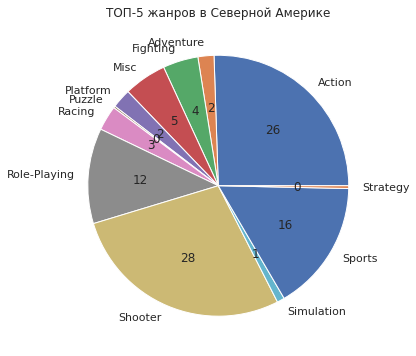

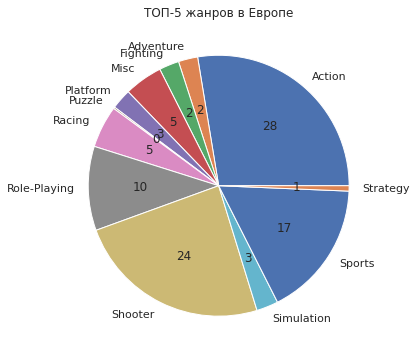

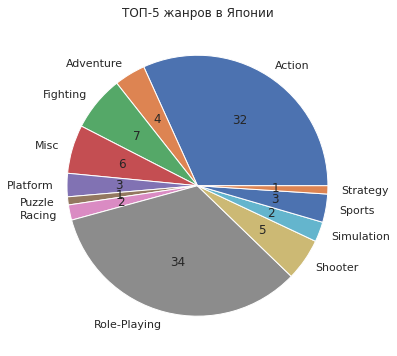

In [31]:
pie_region('genre', 'na_sales', 'ТОП-5 жанров в Северной Америке')
pie_region('genre', 'eu_sales', 'ТОП-5 жанров в Европе')
pie_region('genre', 'jp_sales', 'ТОП-5 жанров в Японии')

В жанрах в целом ситуация аналогична платформам. В ТОП-5 в Европе и Америке входят одинаковые жанры:
- Action (26% в Америке и 28% в Европе)
- Sports (16% и 17% соответственно)
- Shooter (28% и 24%)
- Role-Playing (12% и 10%)
- Misc (по 5%)
Япония отличается от Америки и Европы. Здесь проценты распределились следующим образом:
- Role-Playing 34%
- Action 32%
- Fighting 7% (редко используется в Европе и Америке) 
- Misc 6%
- Shooter 5%.

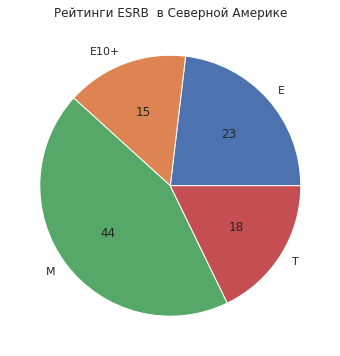

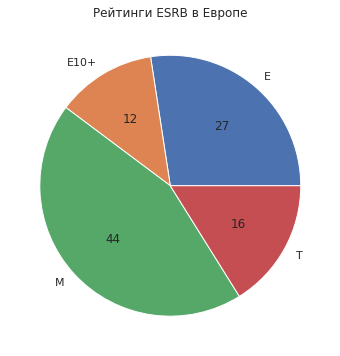

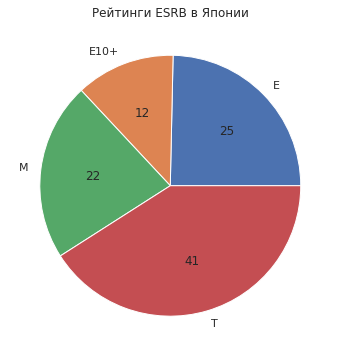

In [32]:
pie_region('rating', 'na_sales', 'Рейтинги ESRB  в Северной Америке')
pie_region('rating', 'eu_sales', 'Рейтинги ESRB в Европе')
pie_region('rating', 'jp_sales', 'Рейтинги ESRB в Японии')

Видим, что пользователи в Северной Америке и Европе предпочитают игры с рейтингом М (34% в Америке и 35% в Европе), с рейтингом Е (18% и 21% соответственно). Игры без рейтинга составляют в Америке 23%, в Европе 22%. Далее попопулярности рейтинг Т (14% в Америке и 13% в Европе). Наименее популярны игры с рейтингом Е10+ (12% и 10% соответственно). В Японии ситуация абсолютно иная: игры с неопределенным рейтингом занимают здесь бОльшую часть 61%, далее рейтинг Т (16%), Е (10%), М (9%). Наименее популярен в Японии, также как в Америке и Европе, рейтинг Е10+(5%).

## Проверка гипотез

### Средние пользовательские рейтинги Xbox One и PC одинаковые

Нулевая гипотеза (Н0) - средние рейтинги пользователей платформ Xbox One и PC одинаковые. Альтернативная гипотеза (Н1) - средние рейтинги пользователей платформ Xbox One и PC различаются. Для проверки Н0 используем ttest, alpha =5%, т.к. дисперсии разные параметру equal_var присвоим значение False.

In [33]:
df_PC = df.query('platform == "PC" and year_of_release >= 2014')
XOne_user_score = df_XOne['user_score']
PC_user_score = df_PC['user_score']
alpha = 0.05
# results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var = False, , nan_policy='omit')
# Ниже поправил твой код
results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var = False, nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



p-значение:  0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Таким образом, нулевая гипотеза о равентстве рейтингов игр, написанных на платформах PC и XOne после 2014 года, подтвердилась. Средние рейтинги пользователей платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports различаются

Нулевая гипотеза (Н0) - средние рейтинги пользователей жанров Action и Sports одинаковые. Альтернативная гипотеза (Н1) - средние рейтинги пользователей жанров Action и Sports различаются. Для проверки Н0 используем ttest, alpha =5%, т.к. дисперсии разные параметру equal_var присвоим значение False.

In [34]:
df_Action = df.query('genre == "Action" and year_of_release>=2014')
df_Sports = df.query('genre == "Sports" and year_of_release>=2014 ')
Action_user_score = df_Action['user_score']
Sports_user_score = df_Sports['user_score']
alpha = 0.05
results = st.ttest_ind(Action_user_score, Sports_user_score, equal_var = False, nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.182555038264477e-14
Отвергаем нулевую гипотезу



В параметрах метода применили параметр nan_policy='omit', который позволил игнорировать пропуски


Т.к. нулевая гипотеза о равенстве пользовательских рейтингов игр, написанных в жанрах Action и Sports после 2014 года, не подтвердилась, делаем вывод о различии рейтингов этих двух жанров

## Общий вывод

В процессе проведенного анализа мы выявили, что в актуальный период (после 2014 года) наибольшие продажи наблюдались по играм, написанным на платформах PS4(более 100 млн.проданных комий) XOne (60 млн.копий). Но эти платформы популярны только в Европе и Америке, в Японии лидирует 3DS (47% всех продаж). Причем продажи по этим платформам очень слабо зависят от рейтингов и пользователей (коэф.корреляции 0,2 и 0,1). Наиболее популярные жанры в Америке и Европе - это Action (более 20% всех продаж) и Shooter (более 20%). В Японии Action (более 30% всех продаж) также популярен. Но также здесь популярен еще и Role-Playing (34% всех продаж). Поэтому рекламные кампании лучше планировать разные: одну для пользователей Европы и Америки, другую - для жителей Японии 